# Proyecto modulo I - Ajutes de curvas

In [95]:
#Importamos librerias
import numpy as np
import pandas as pd
import scipy.optimize as op
import matplotlib.pyplot as plt
%matplotlib inline

De acuerdo al Banco mundial se tienen los siguientes datos con respecto al porcentaje de acceso a la electricidad por parte de la poblacion de 266 paises.

In [2]:
#Extraemos los datos
data=pd.read_excel("C:\\Users\Admin\\Documents\\ITESO\\6°Semestre\\Simulación matematica\\Semana 8\\Proyecto I\\Acesso a electricidad.xlsx")
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,28.381836,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN
2,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,43.222019,69.100000,68.982941,89.500000,71.500000,97.700000,97.700000,98.715622,97.700000,NaN
3,Africa Western and Central,AFW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,45.901299,44.130354,47.018163,47.745499,46.752279,50.948939,48.848205,51.253253,51.341421,NaN
4,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,34.600000,37.101025,38.248993,32.000000,42.000000,41.797379,43.001610,45.290000,45.670315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,99.750000,99.750000,99.680000,99.860000,99.800000,99.800000,100.000000,100.000000,NaN
262,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.885273,52.410000,75.600000,66.100000,67.396667,68.918709,79.200000,62.000000,72.751701,NaN
263,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.600000,85.300000,85.200000,86.000000,85.300000,84.200000,84.400000,84.700000,85.000000,NaN
264,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,26.617790,27.340553,28.087427,27.900000,31.100000,35.173164,40.300000,39.822304,43.000000,NaN


Elegiremos analizar los datos de la República centroafricana (#34) debido a sus números inusualmente bajos.

In [3]:
data.iloc[34]["1995":] #Republica centro africana, 154 - México

1995          3.0
1996     3.334916
1997      3.83021
1998     4.321425
1999     4.807798
2000          6.0
2001     5.761562
2002     6.226599
2003     6.682173
2004     7.127105
2005     7.560375
2006     7.805169
2007     8.405599
2008         7.48
2009     9.263563
2010          9.8
2011    10.310723
2012    10.894282
2013    11.456543
2014    12.052141
2015    12.745728
2016    13.498671
2017    14.169054
2018    14.653953
2019         14.3
2020          NaN
Name: 34, dtype: object

Gráficamos los datos, por simplicidad se iniciara la cuenta desde el año 1995 (Este año lo marcaremos como 0 y de ahi empezaremos a contar).

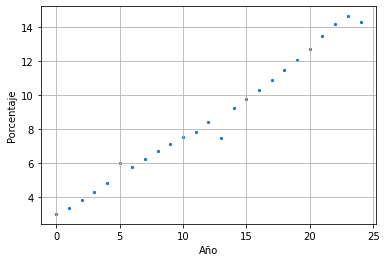

In [105]:
#Generamos nuestras variables
x1 = np.linspace(start= 0, 
                stop= len(data.iloc[34]["1995":])-1, 
                num=len(data.iloc[34]["1995":]))

y1=data.iloc[34]["1995":]

#Graficamos los datos 
plt.figure()
plt.scatter(x1,y1, s=5)
plt.xlabel("Año")
plt.ylabel("Porcentaje")
plt.grid()

Ya con la grafica hacemos nuestras funciones para cada uno de los ajustes

## Ajustes con polinomios

Ajuste polinomio de 1°Orden

In [10]:
#Hacemos nuestra funcion de costo para un polinomio de 1°Orden
def funcion_costo_1(theta,x,y):
    prediccion=theta[0]+theta[1]*x #Polinomio de primer orden
    costo=y-prediccion
    return np.sum(costo**2)

#Valores de theta para el polinomio de 1°Orden
theta_inicial_1=np.random.rand(2) #2 por el orden del polinomio

sol1=op.minimize(funcion_costo_1,
                theta_inicial_1,
                args=(x1,y1))

Ajuste polinomio de 2°Orden

In [11]:
#Hacemos nuestra funcion de costo para un polinomio de 2°Orden
def funcion_costo_2(theta,x,y):
    prediccion=theta[0]+theta[1]*x+theta[2]*x**2 #Polinomio de segundo orden
    costo=y-prediccion
    return np.sum(costo**2)

#Valores de theta para el polinomio de 2°Orden
theta_inicial_2=np.random.rand(3) #3 por el orden del polinomio

sol2=op.minimize(funcion_costo_2,
                theta_inicial_2,
                args=(x1,y1))

Ajuste polinomio de 3°Orden

In [13]:
#Hacemos nuestra funcion de costo para un polinomio de 3°Orden
def funcion_costo_3(theta,x,y):
    prediccion=theta[0]+theta[1]*x+theta[2]*x**2+theta[3]*x**3 #Polinomio de tercer orden
    costo=y-prediccion
    return np.sum(costo**2)

#Valores de theta para el polinomio de 3°Orden
theta_inicial_3=np.random.rand(4) #4 por el orden del polinomio

sol3=op.minimize(funcion_costo_3,
                theta_inicial_3,
                args=(x1,y1))

Ajuste polinomio de 4°Orden

In [14]:
#Hacemos nuestra funcion de costo para un polinomio de 4°Orden
def funcion_costo_4(theta,x,y):
    prediccion=theta[0]+theta[1]*x+theta[2]*x**2+theta[3]*x**3+theta[4]*x**4 #Polinomio de cuarto orden
    costo=y-prediccion
    return np.sum(costo**2)

#Valores de theta para el polinomio de 4°Orden
theta_inicial_4=np.random.rand(5) #5 por el orden del polinomio

sol4=op.minimize(funcion_costo_4,
                theta_inicial_4,
                args=(x1,y1))

Ajuste polinomio de 5°Orden

In [15]:
#Hacemos nuestra funcion de costo para un polinomio de 5°Orden
def funcion_costo_5(theta,x,y):
    prediccion=theta[0]+theta[1]*x+theta[2]*x**2+theta[3]*x**3+theta[4]*x**4+theta[5]*x**5 #Polinomio de quinto orden
    costo=y-prediccion
    return np.sum(costo**2)

#Valores de theta para el polinomio de 5°Orden
theta_inicial_5=np.random.rand(6) #6 por el orden del polinomio

sol5=op.minimize(funcion_costo_5,
                theta_inicial_5,
                args=(x1,y1))

Ajuste polinomio de 6°Orden

In [17]:
#Hacemos nuestra funcion de costo para un polinomio de 6°Orden
def funcion_costo_6(theta,x,y):
    prediccion=theta[0]+theta[1]*x+theta[2]*x**2+theta[3]*x**3+theta[4]*x**4+theta[5]*x**5+theta[6]*x**6 #Polinomio de sexto orden
    costo=y-prediccion
    return np.sum(costo**2)

#Valores de theta para el polinomio de 5°Orden
theta_inicial_6=np.random.rand(7) #7 por el orden del polinomio

sol6=op.minimize(funcion_costo_6,
                theta_inicial_6,
                args=(x1,y1))

Ya con nuestras funciones graficamos cada uno de los ajustes con los datos originales

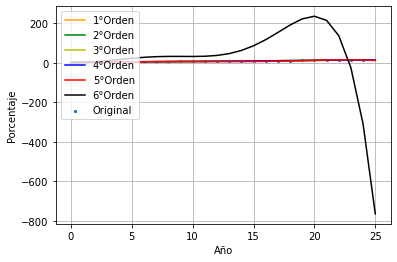

In [101]:
#Graficamos los datos originales con la funcion de costo
plt.figure()
plt.scatter(x1, y1, s=5,label = 'Original') #Grafica original
plt.plot(x1, sol1.x[0] + sol1.x[1]*x1, "orange",label = '1°Orden') #Grafica con polinomio 1°Orden
plt.plot(x1, sol2.x[0] + sol2.x[1]*x1 + sol2.x[2]*x1**2, "g",label = '2°Orden') #Grafica con polinomio 2°Orden
plt.plot(x1, sol3.x[0] + sol3.x[1]*x1 + sol3.x[2]*x1**2 + sol3.x[3]*x1**3, "y",label = '3°Orden') #Grafica con polinomio 3°Orden
plt.plot(x1, sol4.x[0] + sol4.x[1]*x1 + sol4.x[2]*x1**2 + sol4.x[3]*x1**3 + sol4.x[4]*x1**4, "b",label = '4°Orden') #Grafica con polinomio 4°Orden
plt.plot(x1, sol5.x[0] + sol5.x[1]*x1 + sol5.x[2]*x1**2 + sol5.x[3]*x1**3 + sol5.x[4]*x1**4 + sol5.x[5]*x1**5, "r",label = '5°Orden') #Grafica con polinomio 5°Orden
plt.plot(x1, sol6.x[0] + sol6.x[1]*x1 + sol6.x[2]*x1**2 + sol6.x[3]*x1**3 + sol6.x[4]*x1**4 + sol6.x[5]*x1**5 + sol6.x[6]*x1**6, "black",label = '6°Orden')
plt.legend(loc=2)
plt.xlabel("Año")
plt.ylabel("Porcentaje")
plt.grid()

Gráficando nuevamente los ajustes sin el último.

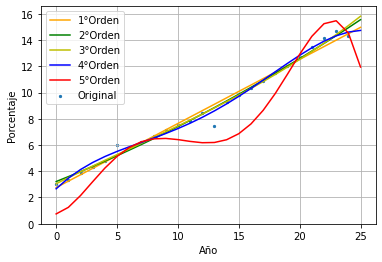

In [102]:
#Graficamos los datos originales con la funcion de costo
plt.figure()
plt.scatter(x1, y1, s=5,label = 'Original') #Grafica original
plt.plot(x1, sol1.x[0] + sol1.x[1]*x1, "orange",label = '1°Orden') #Grafica con polinomio 1°Orden
plt.plot(x1, sol2.x[0] + sol2.x[1]*x1 + sol2.x[2]*x1**2, "g",label = '2°Orden') #Grafica con polinomio 2°Orden
plt.plot(x1, sol3.x[0] + sol3.x[1]*x1 + sol3.x[2]*x1**2 + sol3.x[3]*x1**3, "y",label = '3°Orden') #Grafica con polinomio 3°Orden
plt.plot(x1, sol4.x[0] + sol4.x[1]*x1 + sol4.x[2]*x1**2 + sol4.x[3]*x1**3 + sol4.x[4]*x1**4, "b",label = '4°Orden') #Grafica con polinomio 4°Orden
plt.plot(x1, sol5.x[0] + sol5.x[1]*x1 + sol5.x[2]*x1**2 + sol5.x[3]*x1**3 + sol5.x[4]*x1**4 + sol5.x[5]*x1**5, "r",label = '5°Orden') #Grafica con polinomio 5°Orden
plt.legend(loc=2)
plt.xlabel("Año")
plt.ylabel("Porcentaje")
plt.grid()

De la gráfica anterior nos es dificil deducir cual de los modelos es el mejor puesto que los tres primeros son muy similares entre si por lo que utilizaremos los ajustes del polinomio de 2° y 3° orden.

Graficando este ajuste en los datos originales.

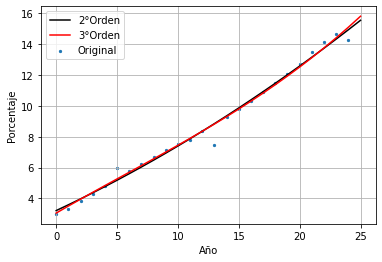

In [98]:
#Graficamos los datos originales con el mejor ajuste
plt.figure()
plt.scatter(x1, y1, s=5,label='Original') #Grafica original
plt.plot(x1, sol2.x[0] + sol2.x[1]*x1 + sol2.x[2]*x1**2, color='black', label = '2°Orden') #Grafica con polinomio 2°Orden
plt.plot(x1, sol3.x[0] + sol3.x[1]*x1 + sol3.x[2]*x1**2 + sol3.x[3]*x1**3, color='r',label = '3°Orden') #Grafica con polinomio 3°Orden
plt.legend(loc=2)
plt.xlabel("Año")
plt.ylabel("Porcentaje")
plt.grid()

Extrapolaremos los datos para ambos modelos para encontrar el año en que se llegue al 100%.

#### Modelo con polinomio de 3°Orden

Para encontrar el año en que llega al 100%

In [ ]:
xp2=0
while(yp<100):
    yp=sol3.x[0] + sol3.x[1]*xp + sol3.x[2]*xp**2 + sol3.x[3]*xp**3
    xp2+=xp2
xp2Para encontrar el año en que llega al 100% 

Encontramos que se necesitan 68 años a partir de 1995.

In [78]:
xp2=68
x2 = np.linspace(start= 0, 
                stop= xp2, 
                num=xp2)

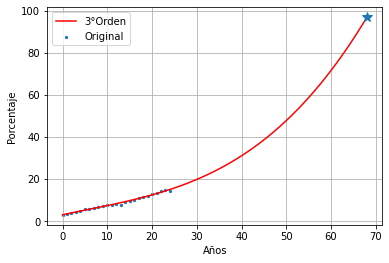

In [103]:
#Gráficamos
plt.figure()
plt.scatter(x1, y1, s=5,label = 'Original') #Grafica original
plt.plot(x2, sol3.x[0] + sol3.x[1]*x2 + sol3.x[2]*x2**2 + sol3.x[3]*x2**3, "r",label = '3°Orden') #Grafica con polinomio 3°Orden
plt.plot(xp2,sol3.x[0] + sol3.x[1]*xp2 + sol3.x[2]*xp2**2 + sol3.x[3]*xp2**3,"*",ms=10)
plt.legend(loc=2)
plt.xlabel("Años")
plt.ylabel("Porcentaje")
plt.grid()

Por lo que el 100% de la población en la República centroafricana tendra acceso a electricidad en:

In [88]:
xp2+1995

2063

#### Modelo con polinomio de 2°Orden

Para encontrar el año en que llega al 100%

In [ ]:
xp3=0
while(yp<100):
    yp3=sol3.x[0] + sol3.x[1]*xp + sol3.x[2]*xp**2 + sol3.x[3]*xp**3
    xp+=xp
xp3 

Encontramos que se necesitan 107 años a partir de 1995.

In [81]:
xp3=107
x3 = np.linspace(start= 0, 
                stop= xp3, 
                num=xp3)

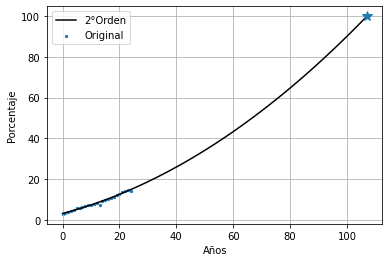

In [104]:
#Gráficamos
xp3=107
yp=sol2.x[0] + sol2.x[1]*xp3 + sol2.x[2]*xp3**2
plt.figure()
plt.scatter(x1, y1, s=5,label = 'Original') #Grafica original
plt.plot(x3, sol2.x[0] + sol2.x[1]*x3 + sol2.x[2]*x3**2, "black",label = '2°Orden') #Grafica con polinomio 2°Orden
plt.plot(xp3,yp,"*",ms=10)
plt.legend(loc=2)
plt.xlabel("Años")
plt.ylabel("Porcentaje")
plt.grid()

Por lo que el 100% de la población en la República centroafricana tendra acceso a electricidad en:

In [87]:
xp3+1995

2102